# **1. 준비된 Custom Dataset 가져오기**

**1-1. 데이터 가져오기**
- VM에 dataset.zip 파일로 업로드 후 압축 풀기

In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/YOLO8/parking_data.zip') as target_file:
    target_file.extractall('/content/parking_data')

In [ ]:
!pip install labelme2yolo

In [ ]:
!labelme2yolo --json_dir /content/parking_data --val_size 0.2 --output_format polygon  # --output_format bbox 또는 polygon(default는 bbox)

INFO:labelme2yolo:Searching label list from json files ...
INFO:labelme2yolo:Converting train set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting val set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting test set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


**1-2. yaml파일 확인하기**
- yaml 파일은 모델학습에 사용되는 데이터의 위치, 클래스의 수, 클래스명의 정보를 가지고 있다.

In [ ]:
!cat /content/parking_data/YOLODataset/dataset.yaml

train: /content/parking_data/YOLODataset/images/train/
val: /content/parking_data/YOLODataset/images/val/
nc: 2
names: ["Driveable Space", "Parking Space"]

# **2. Custom yaml 파일을 만들자.**

In [ ]:
# PyYAML을 설치하자
!pip install PyYAML

In [ ]:
import yaml

data_cf = {'train' : '/content/parking_data/YOLODataset/images/train',
           'val' : '/content/parking_data/YOLODataset/images/val',
           'names' : ["Driveable Space", "Parking Space"],
           'nc' : 2 }

# parking_data.yaml 이란 이름으로 custom yaml 파일을 만든다.
with open('/content/parking_data/YOLODataset/parking_data.yaml', 'w') as f:
  yaml.dump(data_cf, f)

# parking_data.yaml 확인
with open('/content/parking_data/YOLODataset/parking_data.yaml', 'r') as f:
  parking_yaml = yaml.safe_load(f)
  display(parking_yaml)

{'names': ['Driveable Space', 'Parking Space'],
 'nc': 2,
 'train': '/content/parking_data/YOLODataset/images/train',
 'val': '/content/parking_data/YOLODataset/images/val'}

# **3. YOLOv8을 사용하기 위한 Setup(셋업)**

In [ ]:
# ultralytics 설치
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.5/78.2 GB disk)


# **4. Custom YOLO Training(학습)**

**Segmentation 모델로 사용할 수 있는 모델의 종류**

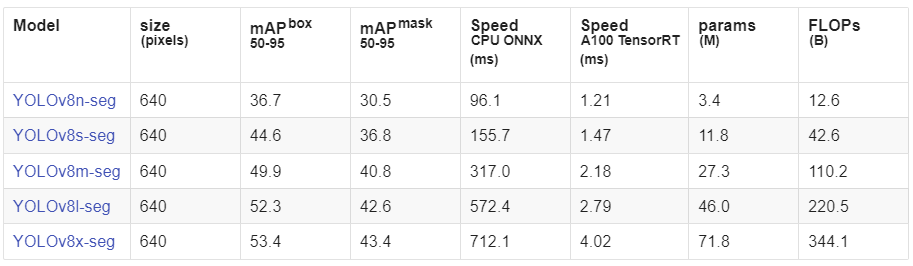

In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 269MB/s]


In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

**불러온 모델 아키텍처를 이용하여 우리가 준비한 Custom Dataset으로 학습을 시켜보자.**

In [ ]:
model.train(data='/content/parking_data/YOLODataset/parking_data.yaml', epochs=100, patience=10, batch=8, imgsz=640)

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/parking_data/YOLODataset/parking_data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 116MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 307MB/s]


AMP: checks passed ✅


train: Scanning /content/parking_data/YOLODataset/labels/train... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:02<00:00, 70.41it/s]

train: New cache created: /content/parking_data/YOLODataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/parking_data/YOLODataset/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 69.12it/s]

val: New cache created: /content/parking_data/YOLODataset/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.66G      1.521       4.12      2.746      1.472         33        640: 100%|██████████| 25/25 [00:22<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]

                   all         50         66      0.969      0.481       0.48      0.394      0.969      0.481      0.478      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.47G     0.8456      1.502      1.209      1.076         27        640: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all         50         66      0.986      0.481      0.482      0.384      0.986      0.481      0.482      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.47G     0.8205      1.278      1.109      1.029         24        640: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all         50         66      0.972      0.478      0.478      0.346      0.972      0.478      0.478      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.45G     0.8213      1.331      1.055      1.042         22        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all         50         66       0.98      0.481      0.519      0.405       0.98      0.481      0.519      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.47G     0.8464      1.286      1.071      1.051         32        640: 100%|██████████| 25/25 [00:15<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all         50         66      0.998      0.481      0.551       0.43      0.422       0.49      0.569      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.48G     0.7425     0.9835     0.9598      1.012         26        640: 100%|██████████| 25/25 [00:15<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all         50         66      0.999      0.481      0.503      0.364      0.999      0.481      0.514      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.47G     0.7019      1.015     0.9194      1.013         24        640: 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all         50         66       0.55      0.516      0.506      0.416      0.581      0.588      0.534      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.47G      0.712      1.041     0.9264      1.006         28        640: 100%|██████████| 25/25 [00:15<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all         50         66      0.724      0.588      0.566      0.412      0.724      0.588      0.577       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.45G     0.6918     0.9714     0.8513     0.9905         23        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         50         66      0.833      0.588        0.6      0.468      0.833      0.588      0.611      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.47G     0.6882      1.078     0.8106     0.9933         32        640: 100%|██████████| 25/25 [00:15<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all         50         66      0.728      0.588       0.54      0.453      0.728      0.588      0.545       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.47G     0.6694      1.038     0.7888       0.99         30        640: 100%|██████████| 25/25 [00:16<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all         50         66      0.825      0.552      0.593      0.493      0.825      0.552      0.594      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.45G     0.6733      1.053     0.7723     0.9752         32        640: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         50         66      0.816      0.588      0.604      0.455      0.816      0.588      0.604      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.45G     0.6157     0.9304     0.7142     0.9739         20        640: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all         50         66      0.755      0.588      0.626       0.52      0.755      0.588      0.627      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.45G     0.6302     0.9501     0.6804     0.9721         25        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         50         66      0.874      0.624      0.651      0.488      0.874      0.624      0.651      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.45G     0.6508     0.9459      0.696     0.9778         29        640: 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all         50         66      0.758      0.588      0.637       0.46      0.758      0.588      0.635       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.47G     0.5959     0.8893     0.6676     0.9716         25        640: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         50         66      0.951      0.552      0.595       0.49      0.951      0.552      0.592      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.45G     0.6091     0.8137     0.6416     0.9835         31        640: 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         50         66      0.665      0.659      0.634      0.528      0.784      0.587      0.637      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.48G      0.585     0.7832     0.5994     0.9507         23        640: 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all         50         66      0.721      0.624      0.657      0.484      0.721      0.624      0.663      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.47G     0.6516     0.9185     0.6372     0.9751         25        640: 100%|██████████| 25/25 [00:17<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all         50         66       0.88      0.652      0.665      0.556       0.88      0.652       0.68      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.47G     0.5863      0.835     0.5919     0.9633         25        640: 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         50         66      0.963      0.516      0.576      0.508      0.963      0.516      0.591      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.47G     0.5536     0.7988     0.5623     0.9624         25        640: 100%|██████████| 25/25 [00:17<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all         50         66      0.872      0.624      0.657      0.518      0.872      0.624      0.658      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.48G     0.5937     0.8677     0.5899     0.9741         28        640: 100%|██████████| 25/25 [00:17<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


                   all         50         66      0.857      0.624      0.653      0.561      0.857      0.624      0.661      0.544

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.47G     0.5728     0.8283     0.5426     0.9498         22        640: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         50         66       0.81      0.695      0.692      0.558      0.864      0.731      0.735      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.45G     0.5618     0.8627     0.5365     0.9531         27        640: 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         50         66       0.66      0.659      0.608      0.526       0.66      0.659      0.608      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.47G     0.5326     0.7377     0.5167     0.9455         27        640: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all         50         66      0.974      0.659      0.695      0.555      0.974      0.659       0.71      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.47G      0.537      0.783     0.5197     0.9375         26        640: 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         50         66      0.965      0.624       0.68      0.566      0.965      0.624       0.68      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.47G     0.5251     0.7783     0.5177     0.9445         22        640: 100%|██████████| 25/25 [00:17<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         50         66      0.896      0.624      0.673      0.524      0.896      0.624      0.685      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.47G     0.5175     0.7171     0.4874     0.9428         23        640: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         50         66       0.82      0.659      0.702      0.556       0.82      0.659      0.702       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.45G      0.544     0.7152     0.5073     0.9375         25        640: 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all         50         66       0.82      0.656      0.728      0.571       0.82      0.656      0.728      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.47G      0.549     0.7589     0.4988     0.9579         31        640: 100%|██████████| 25/25 [00:18<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all         50         66      0.972      0.659      0.724      0.574      0.972      0.659      0.724      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.47G     0.5508     0.8014     0.4854     0.9614         27        640: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all         50         66      0.754      0.719      0.674      0.538      0.754      0.719      0.674      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.47G     0.5011     0.7286     0.4538     0.9417         28        640: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all         50         66       0.74      0.695      0.658      0.519       0.74      0.695      0.658        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.47G     0.5116     0.7661      0.448     0.9192         22        640: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all         50         66      0.808      0.766      0.728      0.593      0.763      0.731      0.689      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.47G      0.513     0.7207     0.4544     0.9273         23        640: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


                   all         50         66      0.825      0.731      0.733      0.581      0.825      0.731      0.719        0.6

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.45G     0.4904     0.6705     0.4291     0.9242         18        640: 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


                   all         50         66      0.895      0.659      0.697      0.585      0.895      0.659      0.697      0.601

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.45G     0.5168     0.6834     0.4554     0.9333         26        640: 100%|██████████| 25/25 [00:18<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all         50         66      0.805      0.695      0.702      0.602      0.805      0.695      0.702      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.45G     0.4582     0.6281     0.4084     0.9311         19        640: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all         50         66      0.742      0.676      0.683      0.599      0.797      0.731      0.704      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.45G     0.4993     0.6966     0.4497     0.9459         23        640: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all         50         66      0.728      0.675      0.658      0.581      0.753      0.695       0.66      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.47G     0.4988     0.6536     0.4199     0.9263         26        640: 100%|██████████| 25/25 [00:19<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         50         66      0.824      0.766      0.723      0.577      0.824      0.766      0.729      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.47G     0.4982     0.7215     0.4443     0.9204         30        640: 100%|██████████| 25/25 [00:18<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all         50         66      0.862      0.624       0.68      0.571      0.984      0.624      0.708       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.45G     0.4551     0.6724     0.3992     0.9129         24        640: 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all         50         66      0.829       0.65      0.712      0.606      0.829       0.65      0.709      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.45G     0.4563     0.6496      0.397     0.9192         28        640: 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all         50         66      0.911      0.731      0.761      0.646      0.911      0.731      0.759      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.47G     0.4751     0.6624      0.416     0.9199         36        640: 100%|██████████| 25/25 [00:19<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all         50         66      0.965      0.731      0.773      0.652      0.965      0.731      0.773      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.47G     0.4729     0.6458     0.4158     0.9106         25        640: 100%|██████████| 25/25 [00:19<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all         50         66      0.914      0.731      0.773      0.659      0.914      0.731      0.773      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.47G     0.4447     0.6448     0.3939     0.9024         26        640: 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all         50         66      0.962      0.659      0.756      0.647      0.962      0.659       0.76      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.47G     0.4446     0.6365     0.3896     0.9045         23        640: 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all         50         66      0.873      0.714      0.758       0.64      0.873      0.714      0.761      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.47G      0.432     0.5925     0.3798     0.9065         22        640: 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all         50         66      0.853      0.679      0.729      0.609      0.853      0.679      0.713      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.45G     0.4444     0.6295     0.3818     0.9231         24        640: 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


                   all         50         66      0.861      0.695      0.739      0.646      0.861      0.695      0.732      0.602

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.47G     0.4338     0.6285     0.3818     0.9076         24        640: 100%|██████████| 25/25 [00:17<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all         50         66      0.985      0.728      0.797      0.679      0.985      0.728      0.801      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.45G     0.4641     0.6185     0.3866     0.9152         23        640: 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all         50         66      0.987      0.758      0.813       0.68      0.987      0.758      0.821      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.45G     0.4526     0.6702     0.3913     0.9124         25        640: 100%|██████████| 25/25 [00:19<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all         50         66      0.887      0.758      0.793      0.677      0.887      0.758      0.795       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.45G     0.4178     0.6423     0.3544      0.904         34        640: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all         50         66      0.984      0.773      0.798      0.664      0.984      0.773      0.798      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.47G     0.4195     0.6124     0.3559     0.8974         22        640: 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all         50         66      0.992      0.695      0.758      0.632      0.992      0.695      0.759      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.45G     0.4258     0.5921     0.3588     0.9001         24        640: 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all         50         66      0.983      0.695      0.801      0.658      0.983      0.695      0.794      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.47G     0.4414     0.6394     0.3804     0.9118         22        640: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all         50         66      0.843      0.819      0.848      0.702       0.87      0.812      0.855      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.47G     0.4331     0.6055     0.3633     0.9022         22        640: 100%|██████████| 25/25 [00:18<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         50         66       0.85      0.848      0.857      0.674      0.843      0.809      0.841       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.47G     0.4413      0.683     0.3822     0.9111         25        640: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         50         66      0.821      0.695      0.775      0.644      0.821      0.695      0.778      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.47G     0.4176     0.6373     0.3581     0.9052         19        640: 100%|██████████| 25/25 [00:17<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all         50         66      0.914      0.731      0.777      0.654      0.914      0.731      0.773      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.47G     0.4374     0.6489     0.3671     0.9187         24        640: 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all         50         66      0.863      0.735      0.817        0.7      0.863      0.735      0.821      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.47G     0.4528     0.6273     0.3654     0.9116         28        640: 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         50         66      0.914      0.766      0.792      0.653      0.914      0.766      0.804      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.47G     0.4542     0.5919     0.3602     0.9171         26        640: 100%|██████████| 25/25 [00:17<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all         50         66      0.802      0.731      0.716        0.6      0.773      0.731      0.722      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.47G     0.4109     0.5501     0.3437     0.8962         28        640: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all         50         66      0.836      0.729      0.709      0.593      0.719      0.737      0.697      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.49G     0.4065     0.5852     0.3463     0.8999         22        640: 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all         50         66      0.928      0.726      0.786      0.626      0.849      0.731      0.769      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.47G     0.4262     0.5976     0.3456     0.9132         30        640: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all         50         66       0.93      0.728      0.811      0.652      0.796      0.761      0.793      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.47G     0.4013     0.5157     0.3358     0.9009         27        640: 100%|██████████| 25/25 [00:15<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all         50         66       0.87      0.731      0.817       0.64      0.731       0.85      0.828      0.641
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 55, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



65 epochs completed in 0.404 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


                   all         50         66      0.844       0.82      0.848      0.703      0.869      0.812      0.856      0.661
       Driveable Space         50         52      0.933      0.981      0.993      0.944      0.944      0.981      0.993      0.939
         Parking Space         11         14      0.754      0.659      0.703      0.461      0.795      0.643       0.72      0.384
Speed: 0.2ms preprocess, 7.4ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787949e8a7a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

# **5. Training(학습) 결과 확인**

**학습 결과를 그래프로 저장한 파일을 통해 확인해 본다**

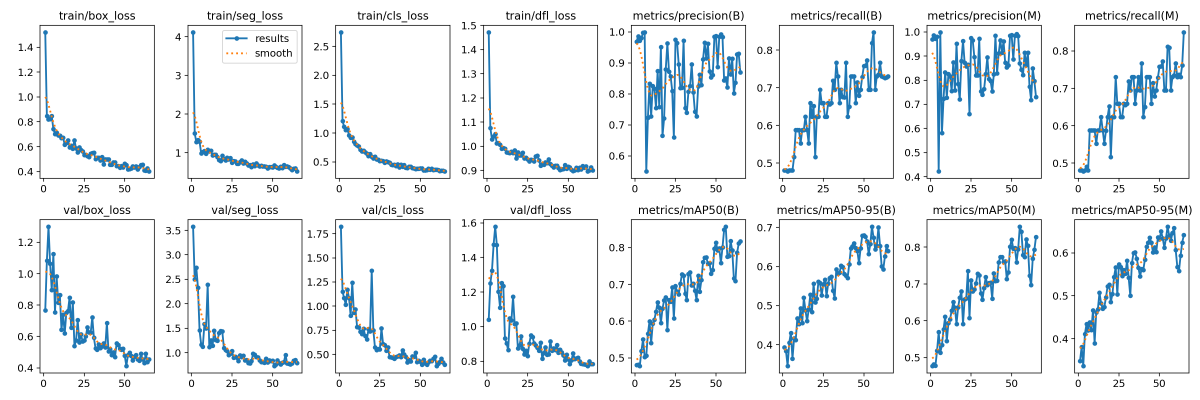

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

result_img = cv2.imread('/content/runs/segment/train/results.png')
fix_width = 1200
height,width = result_img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
result_img = cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

**Custom 모델이 분류할 수 있는 부류 확인**

In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 2
{0: 'Driveable Space', 1: 'Parking Space'}


# **6. Custom 모델로 Segmentation(분할)**

**Image Segmentation**

In [ ]:
# 모델 예측
results = model.predict(source='/content/parking_data/YOLODataset/images/val/2d3ffe0be68f31211b11317af9bd75a6.png', save=True)


image 1/1 /content/parking_data/YOLODataset/images/val/2d3ffe0be68f31211b11317af9bd75a6.png: 384x640 1 Driveable Space, 1 Parking Space, 105.3ms
Speed: 2.9ms preprocess, 105.3ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/train2


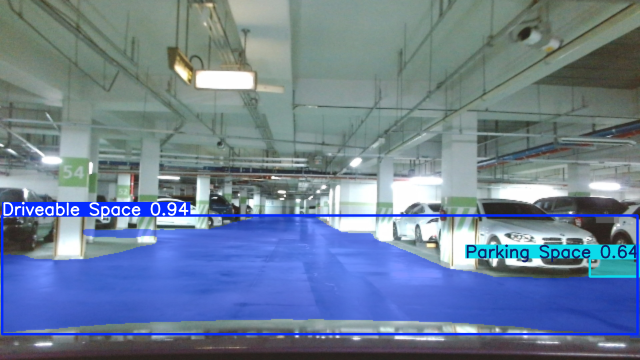

In [ ]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/train2/2d3ffe0be68f31211b11317af9bd75a6.png')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

# **7. 학습된 모델을 불러와 검출**

**Image를 Segmentation하여 동영상으로 저장**

In [ ]:
# ultralytics 설치
!pip install ultralytics

# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# 학습된 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('/content/runs/segment/train/weights/best.pt')

In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 2
{0: 'Driveable Space', 1: 'Parking Space'}


In [ ]:
import os
import cv2
from ultralytics import YOLO
from tqdm import tqdm

model = YOLO('/content/runs/segment/train/weights/best.pt')

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter('output.mp4', fourcc, 10, (1920, 1080))

real_test_dir = '/content/parking_data/YOLODataset/images/val'
image_paths = []

for filename in sorted(os.listdir(real_test_dir)):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in tqdm(image_paths):
    img = cv2.imread(image_path)

    results = model.predict(img, save=True)

    annotated_img = results[0].plot(conf=False, boxes=False)

    out.write(annotated_img)

out.release()

  0%|          | 0/50 [00:00<?, ?it/s]


0: 384x640 1 Driveable Space, 18.5ms
Speed: 3.2ms preprocess, 18.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


  2%|▏         | 1/50 [00:00<00:18,  2.62it/s]


0: 384x640 1 Driveable Space, 12.7ms
Speed: 2.8ms preprocess, 12.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


  4%|▍         | 2/50 [00:00<00:13,  3.61it/s]


0: 384x640 1 Driveable Space, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


  6%|▌         | 3/50 [00:00<00:11,  4.26it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 13.4ms
Speed: 3.1ms preprocess, 13.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


  8%|▊         | 4/50 [00:00<00:10,  4.57it/s]


0: 384x640 1 Driveable Space, 12.6ms
Speed: 4.2ms preprocess, 12.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 10%|█         | 5/50 [00:01<00:09,  4.86it/s]


0: 384x640 1 Driveable Space, 14.8ms
Speed: 3.1ms preprocess, 14.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 12%|█▏        | 6/50 [00:01<00:09,  4.84it/s]


0: 384x640 1 Driveable Space, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 14%|█▍        | 7/50 [00:01<00:08,  5.02it/s]


0: 384x640 1 Driveable Space, 13.3ms
Speed: 3.6ms preprocess, 13.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 16%|█▌        | 8/50 [00:01<00:08,  5.10it/s]


0: 384x640 1 Driveable Space, 12.6ms
Speed: 4.2ms preprocess, 12.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 18%|█▊        | 9/50 [00:01<00:07,  5.21it/s]


0: 384x640 1 Driveable Space, 12.5ms
Speed: 3.3ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 20%|██        | 10/50 [00:02<00:07,  5.35it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 12.5ms
Speed: 4.0ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 22%|██▏       | 11/50 [00:02<00:07,  5.30it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 15.1ms
Speed: 3.5ms preprocess, 15.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 24%|██▍       | 12/50 [00:02<00:07,  5.11it/s]


0: 384x640 4 Driveable Spaces, 12.5ms
Speed: 3.2ms preprocess, 12.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 26%|██▌       | 13/50 [00:02<00:07,  5.20it/s]


0: 384x640 1 Driveable Space, 14.8ms
Speed: 2.9ms preprocess, 14.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 28%|██▊       | 14/50 [00:02<00:06,  5.29it/s]


0: 384x640 1 Driveable Space, 13.5ms
Speed: 3.2ms preprocess, 13.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 30%|███       | 15/50 [00:03<00:06,  5.36it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 12.7ms
Speed: 3.5ms preprocess, 12.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 32%|███▏      | 16/50 [00:03<00:06,  5.43it/s]


0: 384x640 1 Driveable Space, 14.9ms
Speed: 2.8ms preprocess, 14.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 34%|███▍      | 17/50 [00:03<00:06,  5.24it/s]


0: 384x640 1 Driveable Space, 13.4ms
Speed: 2.8ms preprocess, 13.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 36%|███▌      | 18/50 [00:03<00:06,  5.33it/s]


0: 384x640 1 Driveable Space, 13.9ms
Speed: 3.1ms preprocess, 13.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 38%|███▊      | 19/50 [00:03<00:05,  5.31it/s]


0: 384x640 1 Driveable Space, 12.7ms
Speed: 2.9ms preprocess, 12.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 40%|████      | 20/50 [00:03<00:05,  5.38it/s]


0: 384x640 1 Driveable Space, 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 42%|████▏     | 21/50 [00:04<00:05,  5.45it/s]


0: 384x640 1 Driveable Space, 14.8ms
Speed: 3.6ms preprocess, 14.8ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 44%|████▍     | 22/50 [00:04<00:05,  5.29it/s]


0: 384x640 1 Driveable Space, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 46%|████▌     | 23/50 [00:04<00:05,  5.34it/s]


0: 384x640 1 Driveable Space, 15.2ms
Speed: 2.8ms preprocess, 15.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 48%|████▊     | 24/50 [00:04<00:04,  5.31it/s]


0: 384x640 1 Driveable Space, 12.6ms
Speed: 2.9ms preprocess, 12.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 50%|█████     | 25/50 [00:04<00:04,  5.46it/s]


0: 384x640 1 Driveable Space, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 52%|█████▏    | 26/50 [00:05<00:04,  5.49it/s]


0: 384x640 1 Driveable Space, 12.5ms
Speed: 2.9ms preprocess, 12.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 54%|█████▍    | 27/50 [00:05<00:04,  5.41it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 14.8ms
Speed: 3.6ms preprocess, 14.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 56%|█████▌    | 28/50 [00:05<00:04,  5.32it/s]


0: 384x640 1 Driveable Space, 13.6ms
Speed: 2.9ms preprocess, 13.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 58%|█████▊    | 29/50 [00:05<00:03,  5.39it/s]


0: 384x640 1 Driveable Space, 12.6ms
Speed: 2.5ms preprocess, 12.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 60%|██████    | 30/50 [00:05<00:03,  5.35it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 16.5ms
Speed: 2.9ms preprocess, 16.5ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 62%|██████▏   | 31/50 [00:06<00:03,  4.79it/s]


0: 384x640 1 Driveable Space, 20.1ms
Speed: 3.1ms preprocess, 20.1ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 64%|██████▍   | 32/50 [00:06<00:04,  4.37it/s]


0: 384x640 1 Driveable Space, 13.9ms
Speed: 3.1ms preprocess, 13.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 66%|██████▌   | 33/50 [00:06<00:04,  4.22it/s]


0: 384x640 1 Driveable Space, 16.6ms
Speed: 3.3ms preprocess, 16.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 68%|██████▊   | 34/50 [00:06<00:03,  4.11it/s]


0: 384x640 1 Driveable Space, 14.0ms
Speed: 3.1ms preprocess, 14.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 70%|███████   | 35/50 [00:07<00:03,  4.10it/s]


0: 384x640 1 Driveable Space, 17.5ms
Speed: 2.9ms preprocess, 17.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 72%|███████▏  | 36/50 [00:07<00:03,  3.88it/s]


0: 384x640 2 Driveable Spaces, 1 Parking Space, 15.8ms
Speed: 3.2ms preprocess, 15.8ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 74%|███████▍  | 37/50 [00:07<00:03,  3.92it/s]


0: 384x640 1 Driveable Space, 14.9ms
Speed: 3.3ms preprocess, 14.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 76%|███████▌  | 38/50 [00:07<00:03,  3.89it/s]


0: 384x640 1 Driveable Space, 14.7ms
Speed: 3.5ms preprocess, 14.7ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 78%|███████▊  | 39/50 [00:08<00:02,  3.92it/s]


0: 384x640 1 Driveable Space, 14.6ms
Speed: 3.4ms preprocess, 14.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 80%|████████  | 40/50 [00:08<00:02,  3.80it/s]


0: 384x640 1 Driveable Space, 16.7ms
Speed: 3.5ms preprocess, 16.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 82%|████████▏ | 41/50 [00:08<00:02,  3.84it/s]


0: 384x640 1 Driveable Space, 18.1ms
Speed: 3.2ms preprocess, 18.1ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 84%|████████▍ | 42/50 [00:08<00:02,  3.81it/s]


0: 384x640 1 Driveable Space, 14.7ms
Speed: 3.3ms preprocess, 14.7ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 86%|████████▌ | 43/50 [00:09<00:01,  3.81it/s]


0: 384x640 1 Driveable Space, 15.0ms
Speed: 3.4ms preprocess, 15.0ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 88%|████████▊ | 44/50 [00:09<00:01,  3.77it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 16.4ms
Speed: 3.1ms preprocess, 16.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 90%|█████████ | 45/50 [00:09<00:01,  3.80it/s]


0: 384x640 1 Driveable Space, 14.8ms
Speed: 3.5ms preprocess, 14.8ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 92%|█████████▏| 46/50 [00:10<00:01,  3.79it/s]


0: 384x640 1 Driveable Space, 14.7ms
Speed: 3.8ms preprocess, 14.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 94%|█████████▍| 47/50 [00:10<00:00,  3.78it/s]


0: 384x640 1 Driveable Space, 14.8ms
Speed: 3.4ms preprocess, 14.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 96%|█████████▌| 48/50 [00:10<00:00,  3.85it/s]


0: 384x640 1 Driveable Space, 1 Parking Space, 15.1ms
Speed: 3.1ms preprocess, 15.1ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


 98%|█████████▊| 49/50 [00:10<00:00,  3.95it/s]


0: 384x640 1 Driveable Space, 16.0ms
Speed: 3.8ms preprocess, 16.0ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


100%|██████████| 50/50 [00:11<00:00,  4.52it/s]
